<a href="https://colab.research.google.com/github/NeresWell/Analises-GeoEspaciais/blob/main/analise_imoveis_rj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet
https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais.html

# Entendendo como são plotados dados de 'Latitude' e 'Longitude'

Imagine o mundo em um plano cartesiano onde o eixo X representa a 'longitude' e o eixo y representa a 'latitude', no meio do eixo x temos a longitude 0 que vai até 180 para a direita e até -180 para esquerda, no meio do exito y temos a latitude 0 que vai até 90 para cima e até -90 para baixo. Entendendo isso podemos marcar um ponto na coordenada de qualquer lugar, exemplo, no Google Maps se pesquisar pela latitude 30 e longitude -90, o mapa vai apontar para cidade 'Nova Orleans' nos EUA, na imagem abaixo esse o ponto P1, entender isso é o suficiente para plotar dados geográficos.

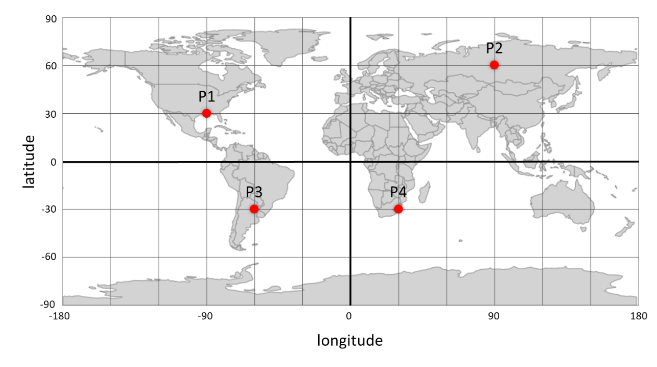

# Importando dados dos municípios do RJ e filtrando apenas o município do 'Rio de Janeiro'

In [ ]:
import geopandas as gpd

In [ ]:
# Obs: links do github devem ser obtidos copiando do opção Raw
url = 'https://github.com/NeresWell/Analises-GeoEspaciais/raw/refs/heads/main/RJ_Municipios_2022/RJ_Municipios_2022.shp'

In [ ]:
rj = gpd.read_file(url)

In [ ]:
rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


In [ ]:
type(rj)

geopandas.geodataframe.GeoDataFrame

<Axes: >

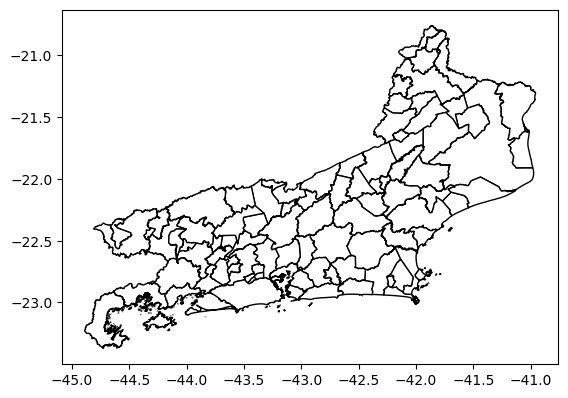

In [ ]:
rj.plot(
    color='white',
    edgecolor='black'
)

In [ ]:
rj = rj[rj['NM_MUN']=='Rio de Janeiro']
rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.6605 ..."


<Axes: >

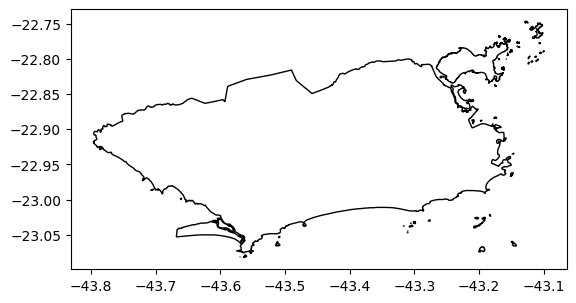

In [ ]:
# filtrando somente o munucipio Rio de Janeiro
rj.plot(
    color='white',
    edgecolor='black'
)

In [ ]:
# exportando dados do municio para um arquivo
rj.to_file('RJ-MUNIC.shp')

<Axes: >

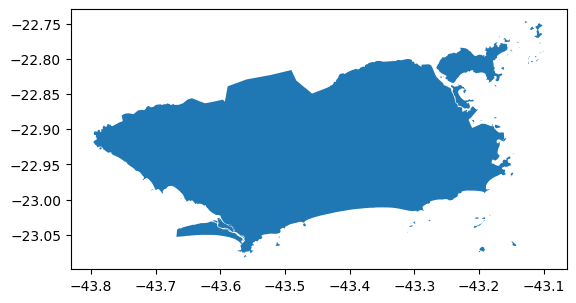

In [ ]:
rj_munic = gpd.read_file('RJ-MUNIC.shp')
rj_munic.plot()

# Subindo dados de imoveis do RJ

In [ ]:
import pandas as pd

In [ ]:
url_dados_imoveis = 'https://github.com/NeresWell/Analises-GeoEspaciais/raw/refs/heads/main/RJ_Municipios_2022/dados.csv'

In [ ]:
df = pd.read_csv(url_dados_imoveis, sep='\t')
df

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000


# Transformando o dataset de imoveis do RJ em um GeoDataFrame
Utilizando as colunas 'Latitude' e 'Longitude' do dataset de imoveis do RJ para criar uma nova coluna com as duas informações unidas, a 'Longitude' é colocada primeira pq normalmente ela é representado no eixo X do gráfico.

In [ ]:
# criando uma lista unindo os dados da coluna 'Longitude' e 'Latitude'
list(zip(df['Longitude'], df['Latitude']))

## Criando uma coluna 'geometry' para o dataset de imoveis com os dados de 'Longitude' e 'Latitude' unidos
Cada uma das linhas do dataset de imoveis do RJ será representado como um 'ponto' no gráfico

In [ ]:
# Essa biblioteca será utilizada para criar um ponto no plano cartesiano utilizando cada linha da coluna 'geometry' que vamos criar
from shapely import Point

In [ ]:
pontos_geometricos = [Point(x) for x in zip(df['Longitude'], df['Latitude'])]
pontos_geometricos

In [ ]:
# CRS - sistema de coordenadas geográficas
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

In [ ]:
# adicionando uma coluna de dados geometricos no dataframe de imoveis do RJ 'df'
geo_dados_imoveis_rj = gpd.GeoDataFrame(df, crs=crs, geometry=pontos_geometricos)
geo_dados_imoveis_rj

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.9432)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.4127 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.235)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


In [ ]:
geo_dados_imoveis_rj.to_file('DATASET.shp')

<Axes: >

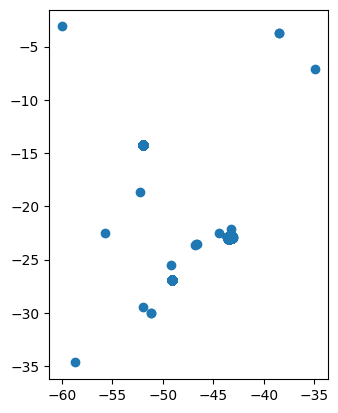

In [ ]:
# apresentando os pontos no plano cartesiano
geo_dados_imoveis_rj.plot()

# Colocando os dados de Imoveis e do município no mesmo sistema de coordenadas
CRS - Sistema de referência de coordenadas, o parâmetro proj significa projeção, a terra é um objeto 3d para representar no computador nos precisamos representar isso de forma plana, a principal projeção utilizada é cilíndrica. Ellps são diferentes formas de elipse para representar a terra. Datum define os eixos e a posição central do elipsoide

In [ ]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
geo_dados_imoveis_rj.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# definindo o mesmo CRS para o mapa do RJ e para os dados de Imoveis do RJ

Utilizando o chatGpt para encontrar a zona UTM do RJ

🤖 Qual a zona UTM em que o município di Rio de Janeiro está inserido?

R: 23S

🤖 Qual o EPSG para zona UTM 23S utilizando o SIRGAS 2000?

EPSG é um código que representa coorddenadas geográficas da zona UTM

R: 31983

# Verificando EPSG
no site https://spatialreference.org/ref/epsg/31983/ é possível verificar as informações que serão passadas como parametros para função crs do geoPandas clicando na opção 'Proj4'

In [ ]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')

In [ ]:
geo_dados_imoveis_rj = geo_dados_imoveis_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')

In [ ]:
geo_dados_imoveis_rj.shape

(5000, 14)

In [ ]:
# temos imoveis fora do municipio RJ, então vamos filtrar apenas os imoveis contindos no municio 'Rio de Janeiro'
geo_dados_imoveis_rj = geo_dados_imoveis_rj[geo_dados_imoveis_rj['geometry'].within(rj.iloc[0].geometry)]

In [ ]:
geo_dados_imoveis_rj.shape

(4513, 14)

<Axes: >

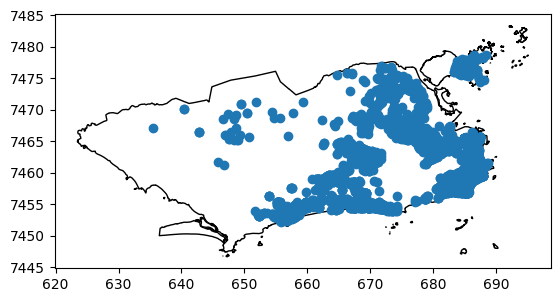

In [ ]:
# agora com apenas os imoveis que pertencem ao municio do RJ podemos plotar no mapa
base = rj.plot(color='white', edgecolor='black')
geo_dados_imoveis_rj.plot(ax=base)

# Carregando dataset de metro
Agora vamos carregar o dataset de estações de metro para plotar no mata todas as estações

https://www.data.rio/datasets/7a0b22723c5a458faaae79f046163504_19/explore

In [ ]:
url_metro_rj = 'https://github.com/NeresWell/Analises-GeoEspaciais/raw/refs/heads/main/RJ_Municipios_2022/metro.geojson'

In [ ]:
metro = gpd.read_file(url_metro_rj)
metro

In [ ]:
# adicionando o sistema de cordenadas que estamos usando nos outros dataset
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')

<Axes: >

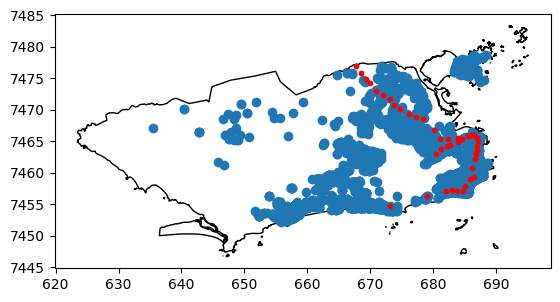

In [ ]:
# perceba que a base é o mapa do RJ, os dados de imoveis e metro são camadas adicionadas
base = rj.plot(color='white', edgecolor='black')
geo_dados_imoveis_rj.plot(ax=base)
metro.plot(ax=base,color='red', markersize=10)

# Calcular a distancia da estação mais proxima do metro para cada case e verificar se existe uma correlação com o preço

In [ ]:
# estamos criando uma coluna com a distancia da estação mais proxima para cada um dos imoveis
geo_dados_imoveis_rj['dist_metro'] = geo_dados_imoveis_rj['geometry'].apply(lambda x: metro.distance(x).min())

In [ ]:
import numpy as np
geo_dados_num = geo_dados_imoveis_rj.select_dtypes(include=[np.number])
correlacao = geo_dados_num.corr()

<Axes: >

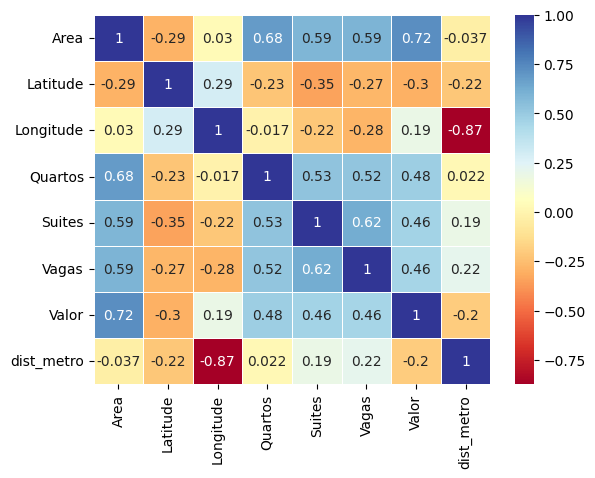

In [ ]:
# Quanto mais proximo de 1 ou -1 a correlação é alta
# Observamos uma correlação de -0.2, o que caracteriza uma correlação negativa. Isso significa que, quando a distância do metrô diminui, o valor do imóvel aumenta
import seaborn as sns

sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

In [ ]:
# acessando dataset das estações de trem
url_trem = 'https://github.com/NeresWell/Analises-GeoEspaciais/raw/refs/heads/main/RJ_Municipios_2022/trem.geojson'

In [ ]:
# acessando dataset das estações de BRT
url_brt = 'https://github.com/NeresWell/Analises-GeoEspaciais/raw/refs/heads/main/RJ_Municipios_2022/brt.geojson'

In [ ]:
trem = gpd.read_file(url_trem)
brt = gpd.read_file(url_brt)

In [ ]:
# os dataset já contém os dados geometricos, padronizar o CRS
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')

In [ ]:
# filtrar os dados para garantir que eles estão dentro do mapa do RJ
trem = trem[trem.within(rj.iloc[0].geometry)]
brt = brt[brt.within(rj.iloc[0].geometry)]

<Axes: >

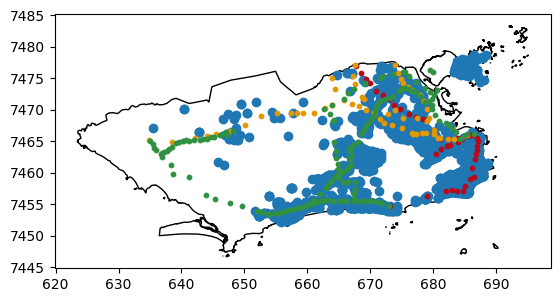

In [ ]:
base = rj.plot(color='white', edgecolor='black')
geo_dados_imoveis_rj.plot(ax=base)
metro.plot(ax=base, color='#b60a1c', markersize=10)
trem.plot(ax=base, color='#e39802', markersize=10)
brt.plot(ax=base, color='#309143', markersize=10)

In [ ]:
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index=True)

In [ ]:
geo_dados_imoveis_rj['dist_transporte'] = geo_dados_imoveis_rj['geometry'].apply(lambda x: transporte.distance(x).min())

In [ ]:
geo_dados_num2 = geo_dados_imoveis_rj.select_dtypes(include=[np.number])
correlacao = geo_dados_num2.corr()

<Axes: >

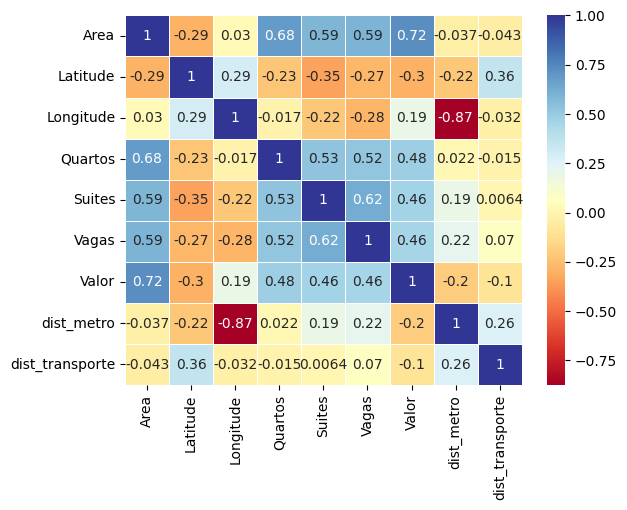

In [ ]:
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
praias = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Alura/geopandas/Cobertura_Vegetal_e_Uso_da_Terra_2018.geojson')

In [ ]:
praias.head()

,objectid,grupo,classe,formacoes,estagio_sucessional,sigla,ano,legenda,smac_,st_areashape,st_perimetershape,geometry
0,49465,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,8684.151722,8684.152076,431.969730,"POLYGON ((-43.56631 -23.06286, -43.56616 -23.0..."
1,49466,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,2209.349128,2209.347164,241.436675,"POLYGON ((-43.59629 -23.04797, -43.5964 -23.04..."
2,49467,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17015.388810,17015.386794,468.729476,"POLYGON ((-43.59742 -23.04846, -43.59725 -23.0..."
3,49468,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17597.587072,17597.571083,916.464380,"POLYGON ((-43.60753 -23.04328, -43.60773 -23.0..."
4,49469,Antropismo,Vegetação gramíneo-lenhosa,,,Vg,2018-06-01 00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.907080,11834.901131,605.329904,"POLYGON ((-43.5712 -23.0593, -43.57117 -23.059..."


In [ ]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')

In [ ]:
praias = praias[praias['classe']=='Praia']

<Axes: >

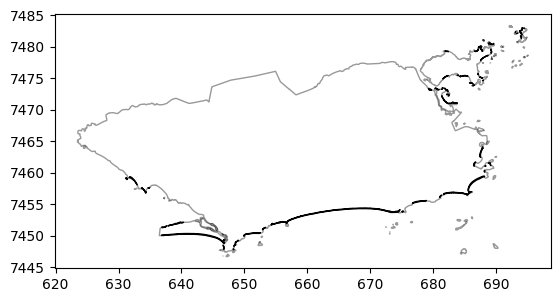

In [ ]:
base = rj.plot(color='white', edgecolor='black', alpha=0.4)
praias.plot(ax=base, color='white', edgecolor='black')

In [ ]:
geo_dados_imoveis_rj['dist_praia'] = geo_dados_imoveis_rj['geometry'].apply(lambda x: praias.distance(x).min())

In [ ]:
geo_dados_num3 = geo_dados_imoveis_rj.select_dtypes(include=[np.number])
correlacao = geo_dados_num3.corr()

<Axes: >

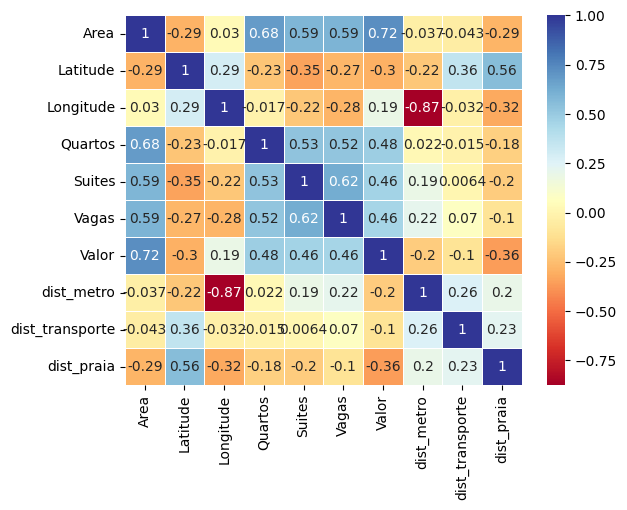

In [ ]:
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

<Axes: xlabel='dist_praia', ylabel='Valor'>

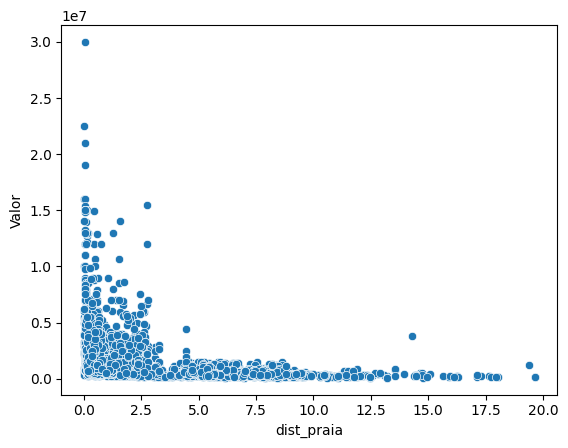

In [ ]:
# perceba que quando a distancia é menor que 2.5 até 0 os valores os pontos do valor estão mais altos, com isso a gente pode concluir que imoveis perto da praia tem o valor influenciado
sns.scatterplot(x='dist_praia', y='Valor', data=geo_dados_imoveis_rj)